In [0]:
import nltk
import numpy as np
import pandas as pd

In [58]:
from google.colab import files
files.upload()

Saving comments.csv to comments.csv


In [59]:
df = pd.read_csv('comments.csv', sep=',')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


##Data Descriptions:
####File content with a large number of Wikipedia comments which have been labeled by human raters for toxic behavior. 
I took this data file for kaggele competations. Link is as https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

Let's Assume that wikipedia comments as a facebbok comments.
##Assumptions:
####ID = Facebook user name
####comment_text= facebook comment
####obscene = comment contains profane word or not.

In [63]:
fb=pd.DataFrame(df,columns=['id','comment_text','obscene'])
print(fb.tail())

                      id  ... obscene
159566  ffe987279560d7ff  ...       0
159567  ffea4adeee384e90  ...       0
159568  ffee36eab5c267c9  ...       0
159569  fff125370e4aaaf3  ...       0
159570  fff46fc426af1f9a  ...       0

[5 rows x 3 columns]


In [0]:

# Libraries
import pandas as pd
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pytablewriter
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
#import scikitplot.metrics as skplt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import linear_model
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm
import os

In [0]:
# Train -Test splitting
from sklearn.model_selection import train_test_split
clean_text=fb['comment_text']
y_pro=fb['obscene']
X_train_data ,X_test_data,Y_train_data,Y_test_data = train_test_split(clean_text,
                                                                      y_pro.values.ravel(),
                                                                      test_size=0.3,
                                                                      shuffle=False)

**FINDING DEGREE OF PROFINITY USING PROFINITY CHECK INBUILT FUNCTION**

In [0]:
from profanity_check import predict, predict_prob

degree=predict_prob(X_train_data)
pred=predict(X_train_data)

In [67]:
dd2=pd.DataFrame(degree) 
dd2['profanity_check']=dd2
print(dd2.shape)

(111699, 2)


In [68]:
dd2.head()

,0,profanity_check
0,0.010772,0.010772
1,0.036943,0.036943
2,0.113634,0.113634
3,0.002435,0.002435
4,0.080698,0.080698


In [70]:

Testing_score=round(accuracy_score(Y_train_data ,pred),5)
print("Accuracy Score = ",Testing_score)
Testing_error=1-Testing_score
print("Testing error = ",Testing_error)

Accuracy Score =  0.9681
Testing error =  0.03190000000000004


In [0]:
degree1=predict_prob(X_test_data)
pred1=predict(X_test_data)

In [72]:
dd3=pd.DataFrame(degree1) 
dd3['profanity_check']=dd3

print(dd3.shape)
print(dd3.head())

(47872, 2)
          0  profanity_check
0  0.527314         0.527314
1  0.068590         0.068590
2  0.011506         0.011506
3  0.300528         0.300528
4  0.000233         0.000233


In [0]:
F1_score = round(f1_score(Y_test_data ,pred1,average='macro'),5)
recall = round(recall_score(Y_test_data,pred1,average='macro'),5)
precision = round(precision_score(Y_test_data ,pred1,average='macro'),5)

In [74]:
print(classification_report(Y_test_data,pred1))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     45347
           1       0.64      0.89      0.75      2525

    accuracy                           0.97     47872
   macro avg       0.82      0.93      0.86     47872
weighted avg       0.98      0.97      0.97     47872



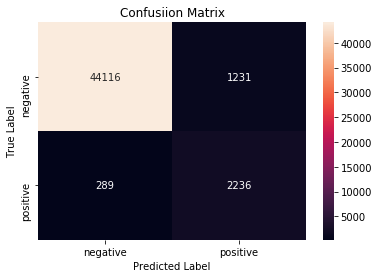

In [75]:
cm = confusion_matrix(Y_test_data ,pred1)
label = ['negative', 'positive']
df_conf = pd.DataFrame(cm, index = label, columns = label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [79]:
Degree_profanity=pd.DataFrame()
Degree_profanity['profanity_check']=dd3[0]
print(Degree_profanity.head(10))

   profanity_check
0         0.527314
1         0.068590
2         0.011506
3         0.300528
4         0.000233
5         0.089318
6         0.927692
7         0.012519
8         0.086360
9         0.031563


##**CONCLUSION**

1. This program is tested with various scoring metrics (e.g. Accuracy of model which is shown in table,f1,recall,precision ) confusion metrics

2. Here, I used 'Profanity_check' a inbuilt library in sklearn for profanity detection

3. degree_profanity indicates the degree of profanity for each sentence in the file


